Import packages and read in data. I view the data and look at the variable types

In [1]:
import pandas as pd
import numpy as np

In [2]:
df = pd.read_table("/Users/brycebangerter/Documents/countries_of_the_world.txt")

In [3]:
df

,Country,Region,Population,Area (sq. mi.),Pop. Density (per sq. mi.),Coastline (coast/area ratio),Net migration,Infant mortality (per 1000 births),GDP ($ per capita),Literacy (%),Phones (per 1000),Arable (%),Crops (%),Other (%),Climate,Birthrate,Deathrate,Agriculture,Industry,Service
0,Afghanistan,ASIA (EX. NEAR EAST),31056997,647500,"48,0","0,00","23,06","163,07",700.0,"36,0","3,2","12,13","0,22","87,65",1,"46,6","20,34","0,38","0,24","0,38"
1,Albania,EASTERN EUROPE,3581655,28748,"124,6","1,26","-4,93","21,52",4500.0,"86,5","71,2","21,09","4,42","74,49",3,"15,11","5,22","0,232","0,188","0,579"
2,Algeria,NORTHERN AFRICA,32930091,2381740,"13,8","0,04","-0,39",31,6000.0,"70,0","78,1","3,22","0,25","96,53",1,"17,14","4,61","0,101","0,6","0,298"
3,American Samoa,OCEANIA,57794,199,"290,4","58,29","-20,71","9,27",8000.0,"97,0","259,5",10,15,75,2,"22,46","3,27",NaN,NaN,NaN
4,Andorra,WESTERN EUROPE,71201,468,"152,1","0,00","6,6","4,05",19000.0,"100,0","497,2","2,22",0,"97,78",3,"8,71","6,25",NaN,NaN,NaN
5,Angola,SUB-SAHARAN AFRICA,12127071,1246700,"9,7","0,13",0,"191,19",1900.0,"42,0","7,8","2,41","0,24","97,35",NaN,"45,11","24,2","0,096","0,658","0,246"
6,Anguilla,LATIN AMER. & CARIB,13477,102,"132,1","59,80","10,76","21,03",8600.0,"95,0","460,0",0,0,100,2,"14,17","5,34","0,04","0,18","0,78"
7,Antigua & Barbuda,LATIN AMER. & CARIB,69108,443,"156,0","34,54","-6,15","19,46",11000.0,"89,0","549,9","18,18","4,55","77,27",2,"16,93","5,37","0,038","0,22","0,743"
8,Argentina,LATIN AMER. & CARIB,39921833,2766890,"14,4","0,18","0,61","15,18",11200.0,"97,1","220,4","12,31","0,48","87,21",3,"16,73","7,55","0,095","0,358","0,547"
9,Armenia,C.W. OF IND. STATES,2976372,29800,"99,9","0,00","-6,47","23,28",3500.0,"98,6","195,7","17,55","2,3","80,15",4,"12,07","8,23","0,239","0,343","0,418"


In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 227 entries, 0 to 226
Data columns (total 20 columns):
Country                               227 non-null object
Region                                227 non-null object
Population                            227 non-null int64
Area (sq. mi.)                        227 non-null int64
Pop. Density (per sq. mi.)            227 non-null object
Coastline (coast/area ratio)          227 non-null object
Net migration                         224 non-null object
Infant mortality (per 1000 births)    224 non-null object
GDP ($ per capita)                    226 non-null float64
Literacy (%)                          209 non-null object
Phones (per 1000)                     223 non-null object
Arable (%)                            225 non-null object
Crops (%)                             225 non-null object
Other (%)                             225 non-null object
Climate                               205 non-null object
Birthrate                 

I drop all rows for countries that are not in the Region of 'Sub-Saharan Africa' or 'Western Europe.' I then look at the header of my data to see that the command worked properly

In [5]:
df.drop([0,1, 2, 3, 6, 7, 8, 9, 10, 11, 13, 14, 15, 16, 17, 18, 20, 22, 23, 24, 25, 27, 28, 29, 30, 32, 34, 36, 38, 41, 42, 43, 47, 48, 50, 51, 52, 53, 56, 57, 58, 59, 60, 61, 64, 67, 70, 71, 74, 75, 80, 81, 82, 83, 84, 88, 89, 90, 91, 92, 94, 95, 96, 97, 100, 102, 103, 105, 106, 108, 109, 110, 111, 112, 113, 114, 115, 118, 120, 122, 123, 126, 127, 130, 131, 135, 136, 137, 139, 140, 141, 144, 145, 147, 148, 149, 150, 153, 155, 156, 157, 158, 159, 160, 161, 162, 163, 165, 166, 168, 169, 172, 173, 174, 175, 176, 179, 181, 184, 185, 186, 187, 191, 193, 197, 198, 199, 201, 203, 204, 205, 206, 207, 208, 209, 211, 212, 214, 215, 216, 217, 218, 219, 220, 221, 222, 223, 224], inplace=True)

In [6]:
df.head()

,Country,Region,Population,Area (sq. mi.),Pop. Density (per sq. mi.),Coastline (coast/area ratio),Net migration,Infant mortality (per 1000 births),GDP ($ per capita),Literacy (%),Phones (per 1000),Arable (%),Crops (%),Other (%),Climate,Birthrate,Deathrate,Agriculture,Industry,Service
4,Andorra,WESTERN EUROPE,71201,468,"152,1","0,00","6,6","4,05",19000.0,"100,0","497,2","2,22",0,"97,78",3,"8,71","6,25",NaN,NaN,NaN
5,Angola,SUB-SAHARAN AFRICA,12127071,1246700,"9,7","0,13",0,"191,19",1900.0,"42,0","7,8","2,41","0,24","97,35",NaN,"45,11","24,2","0,096","0,658","0,246"
12,Austria,WESTERN EUROPE,8192880,83870,"97,7","0,00",2,"4,66",30000.0,"98,0","452,2","16,91","0,86","82,23",3,"8,74","9,76","0,018","0,304","0,678"
19,Belgium,WESTERN EUROPE,10379067,30528,"340,0","0,22","1,23","4,68",29100.0,"98,0","462,6","23,28","0,4","76,32",3,"10,38","10,27","0,01","0,24","0,749"
21,Benin,SUB-SAHARAN AFRICA,7862944,112620,"69,8","0,11",0,85,1100.0,"40,9","9,7","18,08","2,4","79,52",2,"38,85","12,22","0,316","0,138","0,546"


In [7]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 79 entries, 4 to 226
Data columns (total 20 columns):
Country                               79 non-null object
Region                                79 non-null object
Population                            79 non-null int64
Area (sq. mi.)                        79 non-null int64
Pop. Density (per sq. mi.)            79 non-null object
Coastline (coast/area ratio)          79 non-null object
Net migration                         79 non-null object
Infant mortality (per 1000 births)    79 non-null object
GDP ($ per capita)                    79 non-null float64
Literacy (%)                          73 non-null object
Phones (per 1000)                     79 non-null object
Arable (%)                            77 non-null object
Crops (%)                             77 non-null object
Other (%)                             77 non-null object
Climate                               69 non-null object
Birthrate                             79 n

I drop columns for which there are missing values and check to see that it was done correctly.

In [8]:
df.drop(['Literacy (%)', 'Arable (%)', 'Crops (%)', 'Other (%)', 'Agriculture', 'Industry', 'Climate', 'Service'], axis=1, inplace=True)

In [9]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 79 entries, 4 to 226
Data columns (total 12 columns):
Country                               79 non-null object
Region                                79 non-null object
Population                            79 non-null int64
Area (sq. mi.)                        79 non-null int64
Pop. Density (per sq. mi.)            79 non-null object
Coastline (coast/area ratio)          79 non-null object
Net migration                         79 non-null object
Infant mortality (per 1000 births)    79 non-null object
GDP ($ per capita)                    79 non-null float64
Phones (per 1000)                     79 non-null object
Birthrate                             79 non-null object
Deathrate                             79 non-null object
dtypes: float64(1), int64(2), object(9)
memory usage: 8.0+ KB


Many of the values that were entered are decimals but a comma was there instead of a decimal point. Because of this, the data type for these variables are strings/objects when they should be floats. I replace the commas with decimal points and change the data type to float for all of these variables.

In [10]:
df['Pop. Density (per sq. mi.)'] = df['Pop. Density (per sq. mi.)'].str.replace(",",".")

In [11]:
df['Pop. Density (per sq. mi.)'] = df['Pop. Density (per sq. mi.)'].astype(float)

In [12]:
df['Coastline (coast/area ratio)'] = df['Coastline (coast/area ratio)'].str.replace(",",".")

In [13]:
df['Coastline (coast/area ratio)'] = df['Coastline (coast/area ratio)'].astype(float)

In [14]:
df['Net migration'] = df['Net migration'].str.replace(",",".")

In [15]:
df['Net migration'] = df['Net migration'].astype(float)

In [16]:
df['Infant mortality (per 1000 births)'] = df['Infant mortality (per 1000 births)'].str.replace(",",".")

In [17]:
df['Infant mortality (per 1000 births)'] = df['Infant mortality (per 1000 births)'].astype(float)

In [18]:
df['Phones (per 1000)'] = df['Phones (per 1000)'].str.replace(",",".")

In [19]:
df['Phones (per 1000)'] = df['Phones (per 1000)'].astype(float)

In [20]:
df['Birthrate'] = df['Birthrate'].str.replace(",",".")

In [21]:
df['Birthrate'] = df['Birthrate'].astype(float)

In [22]:
df['Deathrate'] = df['Deathrate'].str.replace(",",".")

In [23]:
df['Deathrate'] = df['Deathrate'].astype(float)

In [24]:
df.head()

,Country,Region,Population,Area (sq. mi.),Pop. Density (per sq. mi.),Coastline (coast/area ratio),Net migration,Infant mortality (per 1000 births),GDP ($ per capita),Phones (per 1000),Birthrate,Deathrate
4,Andorra,WESTERN EUROPE,71201,468,152.1,0.00,6.60,4.05,19000.0,497.2,8.71,6.25
5,Angola,SUB-SAHARAN AFRICA,12127071,1246700,9.7,0.13,0.00,191.19,1900.0,7.8,45.11,24.20
12,Austria,WESTERN EUROPE,8192880,83870,97.7,0.00,2.00,4.66,30000.0,452.2,8.74,9.76
19,Belgium,WESTERN EUROPE,10379067,30528,340.0,0.22,1.23,4.68,29100.0,462.6,10.38,10.27
21,Benin,SUB-SAHARAN AFRICA,7862944,112620,69.8,0.11,0.00,85.00,1100.0,9.7,38.85,12.22


I rename the columns to get rid of spaces. This makes it easier later when I work with seaborn visualization tools.

In [25]:
df = df.rename(columns={'Area (sq. mi.)': 'Area_sq_mi', 'Pop. Density (per sq. mi.)': 'Pop_Density_per_sq_mi', 'Coastline (coast/area ratio)': 'Coastline_coast/area_ratio', 'Net migration': 'Net_migration', 'Infant mortality (per 1000 births)': 'Infant_mort_per_1000_births', 'GDP ($ per capita)': 'GDP_per_capita', 'Phones (per 1000)': 'Phones_per_1000'})

I do a series of commands to describe and analyze the data. I do df.describe() to see the summary statistics for the data. df.groupby allows me to group the data by its region (Sub-Saharan Africa or Western Europe) and see the mean of whatever variable I want to look at. I do this for GDP per capita, birthrate, deathrate, population density, net migration, infant mortality rate, and phones per 1000 people. I also group by country to see the mean of whatever variable I want for each individual country. I list the top and bottom 10 countries for different variable values, such as GDP per capita, birth rate, and net migration.

In [26]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 79 entries, 4 to 226
Data columns (total 12 columns):
Country                        79 non-null object
Region                         79 non-null object
Population                     79 non-null int64
Area_sq_mi                     79 non-null int64
Pop_Density_per_sq_mi          79 non-null float64
Coastline_coast/area_ratio     79 non-null float64
Net_migration                  79 non-null float64
Infant_mort_per_1000_births    79 non-null float64
GDP_per_capita                 79 non-null float64
Phones_per_1000                79 non-null float64
Birthrate                      79 non-null float64
Deathrate                      79 non-null float64
dtypes: float64(8), int64(2), object(2)
memory usage: 8.0+ KB


In [27]:
df.describe()

,Population,Area_sq_mi,Pop_Density_per_sq_mi,Coastline_coast/area_ratio,Net_migration,Infant_mort_per_1000_births,GDP_per_capita,Phones_per_1000,Birthrate,Deathrate
count,7.900000e+01,7.900000e+01,79.000000,79.000000,79.000000,79.000000,79.000000,79.000000,79.000000,79.000000
mean,1.450351e+07,3.550871e+05,396.996203,12.501139,0.960886,53.347468,11086.075949,237.905063,27.009367,13.102405
std,2.296819e+07,5.037888e+05,1871.857246,34.731656,2.998511,45.070749,12888.752144,289.056450,14.350814,5.703394
min,7.502000e+03,2.000000e+00,2.500000,0.000000,-12.070000,2.770000,500.000000,0.200000,8.250000,5.490000
25%,7.392660e+05,1.433150e+04,22.900000,0.000000,0.000000,5.200000,1100.000000,7.900000,10.975000,9.210000
50%,6.005250e+06,1.184800e+05,66.600000,0.310000,0.000000,61.470000,2500.000000,27.400000,30.520000,11.110000
75%,1.345845e+07,5.259060e+05,182.850000,3.675000,2.070000,90.600000,22000.000000,479.900000,40.310000,16.385000
max,1.318597e+08,2.505810e+06,16271.500000,205.000000,10.980000,191.190000,55100.000000,1035.600000,50.730000,29.740000


In [28]:
df.groupby(['Region'])['GDP_per_capita'].mean()

Region
SUB-SAHARAN AFRICA                      2323.529412
WESTERN EUROPE                         27046.428571
Name: GDP_per_capita, dtype: float64

In [29]:
df.groupby(['Region'])['Birthrate'].mean()

Region
SUB-SAHARAN AFRICA                     36.043922
WESTERN EUROPE                         10.553571
Name: Birthrate, dtype: float64

In [30]:
df.groupby(['Region'])['Deathrate'].mean()

Region
SUB-SAHARAN AFRICA                     15.160000
WESTERN EUROPE                          9.354643
Name: Deathrate, dtype: float64

In [31]:
df.groupby(['Region'])['Pop_Density_per_sq_mi'].mean()

Region
SUB-SAHARAN AFRICA                      92.264706
WESTERN EUROPE                         952.042857
Name: Pop_Density_per_sq_mi, dtype: float64

In [32]:
df.groupby(['Region'])['Net_migration'].mean()

Region
SUB-SAHARAN AFRICA                    -0.335098
WESTERN EUROPE                         3.321429
Name: Net_migration, dtype: float64

In [33]:
df.groupby(['Region'])['Infant_mort_per_1000_births'].mean()

Region
SUB-SAHARAN AFRICA                     80.039216
WESTERN EUROPE                          4.730357
Name: Infant_mort_per_1000_births, dtype: float64

In [34]:
df.groupby(['Region'])['Phones_per_1000'].mean()

Region
SUB-SAHARAN AFRICA                      42.507843
WESTERN EUROPE                         593.807143
Name: Phones_per_1000, dtype: float64

In [35]:
df.groupby(['Country'])['GDP_per_capita'].mean().nlargest(10)

Country
Luxembourg      55100.0
Norway          37800.0
San Marino      34600.0
Switzerland     32700.0
Denmark         31100.0
Iceland         30900.0
Austria         30000.0
Ireland         29600.0
Belgium         29100.0
Netherlands     28600.0
Name: GDP_per_capita, dtype: float64

In [36]:
df.groupby(['Country'])['GDP_per_capita'].mean().nsmallest(10)

Country
Sierra Leone             500.0
Somalia                  500.0
Burundi                  600.0
Malawi                   600.0
Tanzania                 600.0
Comoros                  700.0
Congo, Dem. Rep.         700.0
Congo, Repub. of the     700.0
Eritrea                  700.0
Ethiopia                 700.0
Name: GDP_per_capita, dtype: float64

In [37]:
df.groupby(['Country'])['Birthrate'].mean().nlargest(10)

Country
Niger                50.73
Mali                 49.82
Uganda               47.35
Sierra Leone         45.76
Chad                 45.73
Burkina Faso         45.62
Somalia              45.13
Angola               45.11
Liberia              44.77
Congo, Dem. Rep.     43.69
Name: Birthrate, dtype: float64

In [38]:
df.groupby(['Country'])['Birthrate'].mean().nsmallest(10)

Country
Germany          8.25
Andorra          8.71
Italy            8.72
Austria          8.74
Guernsey         8.81
Monaco           9.19
Jersey           9.30
Greece           9.68
Switzerland      9.71
San Marino      10.02
Name: Birthrate, dtype: float64

In [39]:
df.groupby(['Country'])['Net_migration'].mean().nlargest(10)

Country
San Marino        10.98
Luxembourg         8.97
Monaco             7.75
Mayotte            6.78
Andorra            6.60
Somalia            5.37
Isle of Man        5.36
Ireland            4.99
Liechtenstein      4.85
Switzerland        4.05
Name: Net_migration, dtype: float64

In [40]:
df.groupby(['Country'])['Net_migration'].mean().nsmallest(10)

Country
Cape Verde             -12.07
Seychelles              -5.69
Guinea                  -3.06
Sao Tome & Principe     -2.72
Tanzania                -2.06
Guinea-Bissau           -1.57
Mauritius               -0.90
Lesotho                 -0.74
Niger                   -0.67
Ghana                   -0.64
Name: Net_migration, dtype: float64

I import the visualization packages I need.

In [41]:
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline

Here I make a scatter plot for various variables from the dataset. I was curious if it looked like there was any correlation between the variables by looking at the scatter plot and OLS rendered line. 

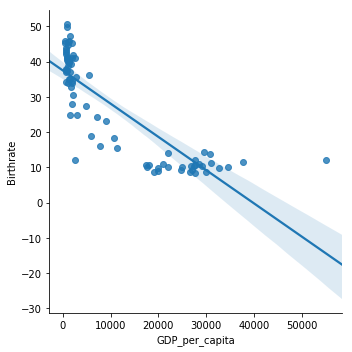

In [42]:
sns.lmplot(x='GDP_per_capita', y="Birthrate", data=df)

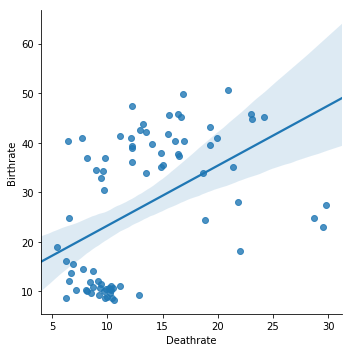

In [43]:
sns.lmplot(x='Deathrate', y="Birthrate", data=df)

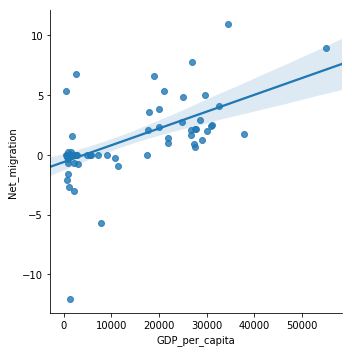

In [44]:
sns.lmplot(x='GDP_per_capita', y="Net_migration", data=df)

Here I do a distribution graph of GDP per capita for all the countries in the data set. However, I'm curious about how the distributions differ from Western Europe and Sub-Saharan Africa for different variables. I make a list of all the country names so I know which indeces to reference when making a new data frame for each Region. After making the new dataframes for each region, I make a combined histogram for both regions on GDP per capita using Seaborn and matplotlib. Then I make a histogram for each individual region of GDP per capita for that respective region. Then I make a combined histogram with seaborn for phones per 1000 people. Lastly I do a combined histogram for population using matplotlib and seaborn.

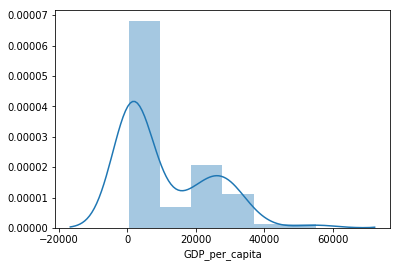

In [45]:
sns.distplot(df.GDP_per_capita)

In [46]:
my_list = []
my_list = df["Country"].tolist()
my_list

['Andorra ',
 'Angola ',
 'Austria ',
 'Belgium ',
 'Benin ',
 'Botswana ',
 'Burkina Faso ',
 'Burundi ',
 'Cameroon ',
 'Cape Verde ',
 'Central African Rep. ',
 'Chad ',
 'Comoros ',
 'Congo, Dem. Rep. ',
 'Congo, Repub. of the ',
 "Cote d'Ivoire ",
 'Denmark ',
 'Djibouti ',
 'Equatorial Guinea ',
 'Eritrea ',
 'Ethiopia ',
 'Faroe Islands ',
 'Finland ',
 'France ',
 'Gabon ',
 'Gambia, The ',
 'Germany ',
 'Ghana ',
 'Gibraltar ',
 'Greece ',
 'Guernsey ',
 'Guinea ',
 'Guinea-Bissau ',
 'Iceland ',
 'Ireland ',
 'Isle of Man ',
 'Italy ',
 'Jersey ',
 'Kenya ',
 'Lesotho ',
 'Liberia ',
 'Liechtenstein ',
 'Luxembourg ',
 'Madagascar ',
 'Malawi ',
 'Mali ',
 'Malta ',
 'Mauritania ',
 'Mauritius ',
 'Mayotte ',
 'Monaco ',
 'Mozambique ',
 'Namibia ',
 'Netherlands ',
 'Niger ',
 'Nigeria ',
 'Norway ',
 'Portugal ',
 'Reunion ',
 'Rwanda ',
 'Saint Helena ',
 'San Marino ',
 'Sao Tome & Principe ',
 'Senegal ',
 'Seychelles ',
 'Sierra Leone ',
 'Somalia ',
 'South Africa ',
 

In [47]:
dfx = df.drop(df.index[[0,2,3, 16, 21, 22, 23, 26, 28, 29, 30, 33, 34, 35, 36, 37, 41, 42, 46, 50, 53, 56, 57, 61, 68, 71, 72, 76]])

In [48]:
dfx

,Country,Region,Population,Area_sq_mi,Pop_Density_per_sq_mi,Coastline_coast/area_ratio,Net_migration,Infant_mort_per_1000_births,GDP_per_capita,Phones_per_1000,Birthrate,Deathrate
5,Angola,SUB-SAHARAN AFRICA,12127071,1246700,9.7,0.13,0.00,191.19,1900.0,7.8,45.11,24.20
21,Benin,SUB-SAHARAN AFRICA,7862944,112620,69.8,0.11,0.00,85.00,1100.0,9.7,38.85,12.22
26,Botswana,SUB-SAHARAN AFRICA,1639833,600370,2.7,0.00,0.00,54.58,9000.0,80.5,23.08,29.50
31,Burkina Faso,SUB-SAHARAN AFRICA,13902972,274200,50.7,0.00,0.00,97.57,1100.0,7.0,45.62,15.60
33,Burundi,SUB-SAHARAN AFRICA,8090068,27830,290.7,0.00,-0.06,69.29,600.0,3.4,42.22,13.46
35,Cameroon,SUB-SAHARAN AFRICA,17340702,475440,36.5,0.08,0.00,68.26,1800.0,5.7,33.89,13.47
37,Cape Verde,SUB-SAHARAN AFRICA,420979,4033,104.4,23.93,-12.07,47.77,1400.0,169.6,24.87,6.55
39,Central African Rep.,SUB-SAHARAN AFRICA,4303356,622984,6.9,0.00,0.00,91.00,1100.0,2.3,33.91,18.65
40,Chad,SUB-SAHARAN AFRICA,9944201,1284000,7.7,0.00,-0.11,93.82,1200.0,1.3,45.73,16.38
44,Comoros,SUB-SAHARAN AFRICA,690948,2170,318.4,15.67,0.00,74.93,700.0,24.5,36.93,8.20


In [49]:
dfy = df.drop(df.index[[1,4,5,6,7,8,9,10,11,12,13,14,15,17,18,19,20,24,25,27,31,32,38,39,40,43,44,45,47,48,49,51,52,54,55,58,59,60,62,63,64,65,66,67,69,70,73,74,75,77,78]])

In [50]:
dfy

,Country,Region,Population,Area_sq_mi,Pop_Density_per_sq_mi,Coastline_coast/area_ratio,Net_migration,Infant_mort_per_1000_births,GDP_per_capita,Phones_per_1000,Birthrate,Deathrate
4,Andorra,WESTERN EUROPE,71201,468,152.1,0.00,6.60,4.05,19000.0,497.2,8.71,6.25
12,Austria,WESTERN EUROPE,8192880,83870,97.7,0.00,2.00,4.66,30000.0,452.2,8.74,9.76
19,Belgium,WESTERN EUROPE,10379067,30528,340.0,0.22,1.23,4.68,29100.0,462.6,10.38,10.27
54,Denmark,WESTERN EUROPE,5450661,43094,126.5,16.97,2.48,4.56,31100.0,614.6,11.13,10.36
66,Faroe Islands,WESTERN EUROPE,47246,1399,33.8,79.84,1.41,6.24,22000.0,503.8,14.05,8.70
68,Finland,WESTERN EUROPE,5231372,338145,15.5,0.37,0.95,3.57,27400.0,405.3,10.45,9.86
69,France,WESTERN EUROPE,60876136,547030,111.3,0.63,0.66,4.26,27600.0,586.4,11.99,9.14
76,Germany,WESTERN EUROPE,82422299,357021,230.9,0.67,2.18,4.16,27600.0,667.9,8.25,10.62
78,Gibraltar,WESTERN EUROPE,27928,7,3989.7,171.43,0.00,5.13,17500.0,877.7,10.74,9.31
79,Greece,WESTERN EUROPE,10688058,131940,81.0,10.37,2.35,5.53,20000.0,589.7,9.68,10.24


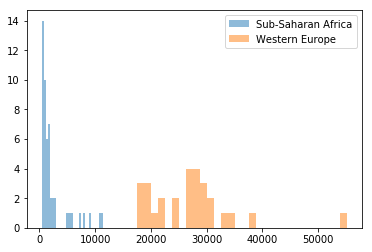

In [51]:
from matplotlib import pyplot
pyplot.hist(dfx['GDP_per_capita'], bins=30, alpha=0.5, label='Sub-Saharan Africa')
pyplot.hist(dfy['GDP_per_capita'], bins=30, alpha=0.5, label='Western Europe')
pyplot.legend(loc='upper right')
pyplot.show()

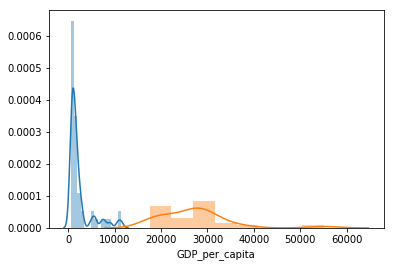

In [52]:
sns.distplot(dfx.GDP_per_capita)
sns.distplot(dfy.GDP_per_capita)

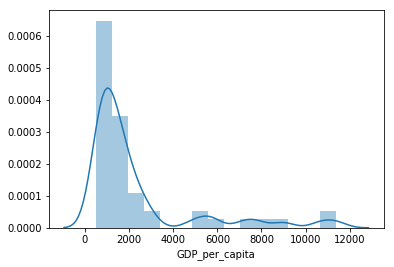

In [53]:
sns.distplot(dfx.GDP_per_capita)

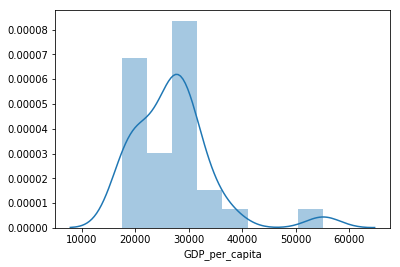

In [54]:
sns.distplot(dfy.GDP_per_capita)

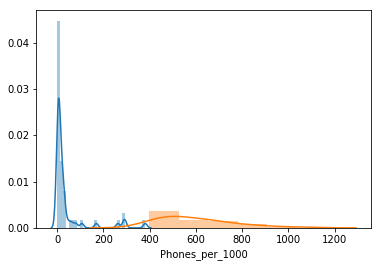

In [55]:
sns.distplot(dfx.Phones_per_1000)
sns.distplot(dfy.Phones_per_1000)

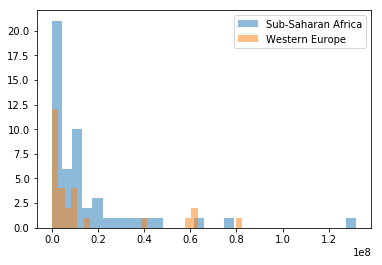

In [56]:
pyplot.hist(dfx['Population'], bins=30, alpha=0.5, label='Sub-Saharan Africa')
pyplot.hist(dfy['Population'], bins=30, alpha=0.5, label='Western Europe')
pyplot.legend(loc='upper right')
pyplot.show()

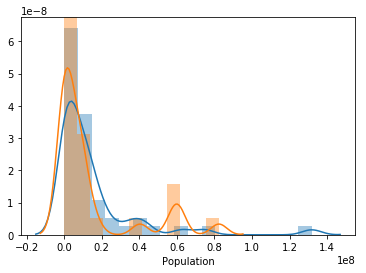

In [57]:
sns.distplot(dfx.Population)
sns.distplot(dfy.Population)